Importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

Importing the cleaned dataset:

In [2]:
import os
dir = os.getcwd()
os.chdir("..")

cleaned_train = pd.read_csv("datasets/clean_train.csv")
os.chdir(dir)

View the cleaned dataset to ensure that the imported dataset is correct:

In [3]:
cleaned_train.head()

,Unnamed: 0,text,emotion,clean_text
0,0,i didnt feel humiliated,sadness,didnt humiliated
1,1,i can go from feeling so hopeless to so damned...,sadness,hopeless damned hopeful care awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,nostalgic fireplace know property
4,4,i am feeling grouchy,anger,grouchy


In [4]:
cleaned_train['clean_text'].fillna(value = "nil", inplace = True)

We start the EDA process by viewing the most commonly used words using WordCLoud:

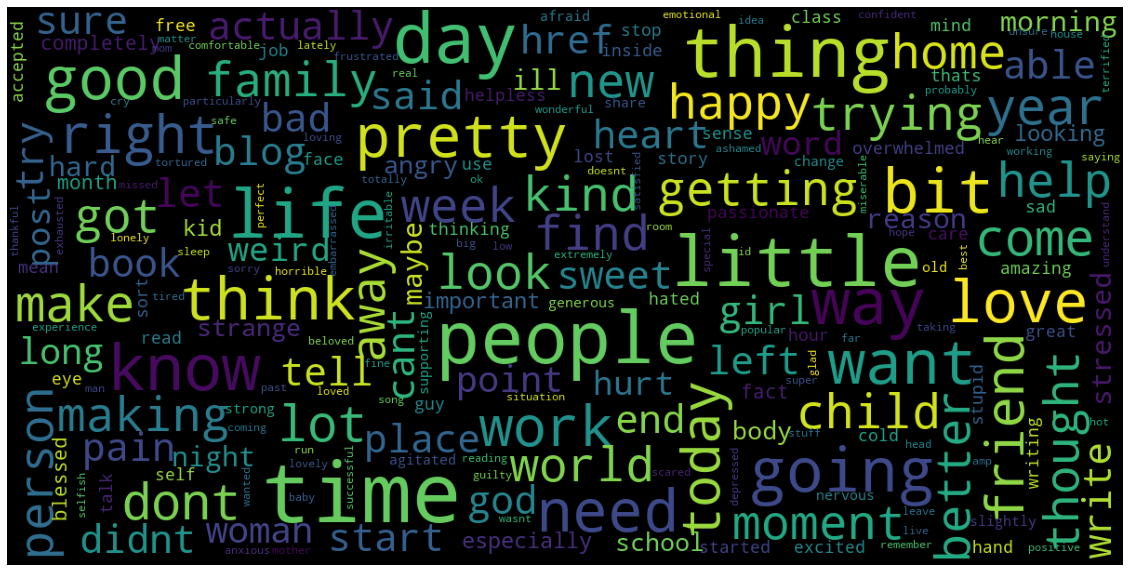

In [5]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, column, bg, max_words, max_font_size, scale, figsize):

    stopwords = set(STOPWORDS)
    text = "".join(t for t in data[column])

    def display():
        wordcloud = WordCloud(
            background_color = bg,
            stopwords = stopwords,
            max_words = max_words,
            max_font_size = max_font_size,
            scale = scale,
            random_state = 1)
    
        wordcloud = wordcloud.generate(str(text))

        fig = plt.figure(1, figsize = figsize)
        plt.axis('off')

        plt.imshow(wordcloud)
        plt.show()

    display()

show_wordcloud(cleaned_train, 'clean_text', 'black', 500, 30, 3, (20, 20))